In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../my_data/outlier_treat.csv")

In [3]:
data.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'equivdiameter', 'extent', 'perimeter', 'roundness',
       'aspectration', 'class'],
      dtype='object')

In [5]:
data.shape

(17647, 11)

In [7]:
data.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,equivdiameter,extent,perimeter,roundness,aspectration,class
0,6374,129.577,63.762,0.871,6476,90.087,0.662,314.656,0.809,2.032,jasmine
1,6946,136.304,65.738,0.876,7115,94.042,0.594,338.782,0.761,2.073,jasmine
2,5786,125.555,59.626,0.880,5945,85.831,0.623,307.304,0.770,2.106,jasmine
3,5896,127.014,59.843,0.882,6092,86.643,0.610,309.264,0.775,2.122,jasmine
4,6082,129.098,60.416,0.884,6204,87.999,0.661,308.106,0.805,2.137,jasmine


Due to the difference value size for some features such as;
- area
- major axis length
- minor axis length
- convex area
- equivdiameter
- perimeter

A Scaler would be used to address such, then PCA would be used to know what number of features would be used for clustering.

These cluster values would also be usedd for classification and regression tasks.

In [8]:
data = pd.get_dummies(data,columns=['class'],drop_first=True)
data.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,equivdiameter,extent,perimeter,roundness,aspectration,class_jasmine
0,6374,129.577,63.762,0.871,6476,90.087,0.662,314.656,0.809,2.032,1
1,6946,136.304,65.738,0.876,7115,94.042,0.594,338.782,0.761,2.073,1
2,5786,125.555,59.626,0.880,5945,85.831,0.623,307.304,0.770,2.106,1
3,5896,127.014,59.843,0.882,6092,86.643,0.610,309.264,0.775,2.122,1
4,6082,129.098,60.416,0.884,6204,87.999,0.661,308.106,0.805,2.137,1


In [9]:
from sklearn.decomposition import  PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [30]:
normalise = data.copy()

In [31]:
columns_ = normalise.columns.tolist()
columns_

['area',
 'majoraxislength',
 'minoraxislength',
 'eccentricity',
 'convexarea',
 'equivdiameter',
 'extent',
 'perimeter',
 'roundness',
 'aspectration',
 'class_jasmine']

In [32]:
to_transform = ['area','majoraxislength','minoraxislength',
                'convexarea','equivdiameter','perimeter']
indexes = [ columns_.index(value) for value in to_transform]
indexes

[0, 1, 2, 4, 5, 7]

In [33]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()

In [34]:
ct1 = ColumnTransformer([
    ('scale',scaler1,indexes)],
    remainder='passthrough')

ct2 = ColumnTransformer([
    ('scale',scaler2,indexes)],
    remainder='passthrough')

ct3 = ColumnTransformer([
    ('scale',scaler3,indexes)],
    remainder='passthrough')

In [35]:
normalise_scaled1 = ct1.fit_transform(normalise)
normalise_scaled2 = ct2.fit_transform(normalise)
normalise_scaled3 = ct3.fit_transform(normalise)

In [36]:
pca1 = PCA().fit(normalise_scaled1)
pca2 = PCA().fit(normalise_scaled2)
pca3 = PCA().fit(normalise_scaled3)

pca_data1 = pca1.transform(normalise_scaled1)
pca_data2 = pca2.transform(normalise_scaled2)
pca_data3 = pca3.transform(normalise_scaled3)

Text(0.5, 1.0, 'StandardScaler')

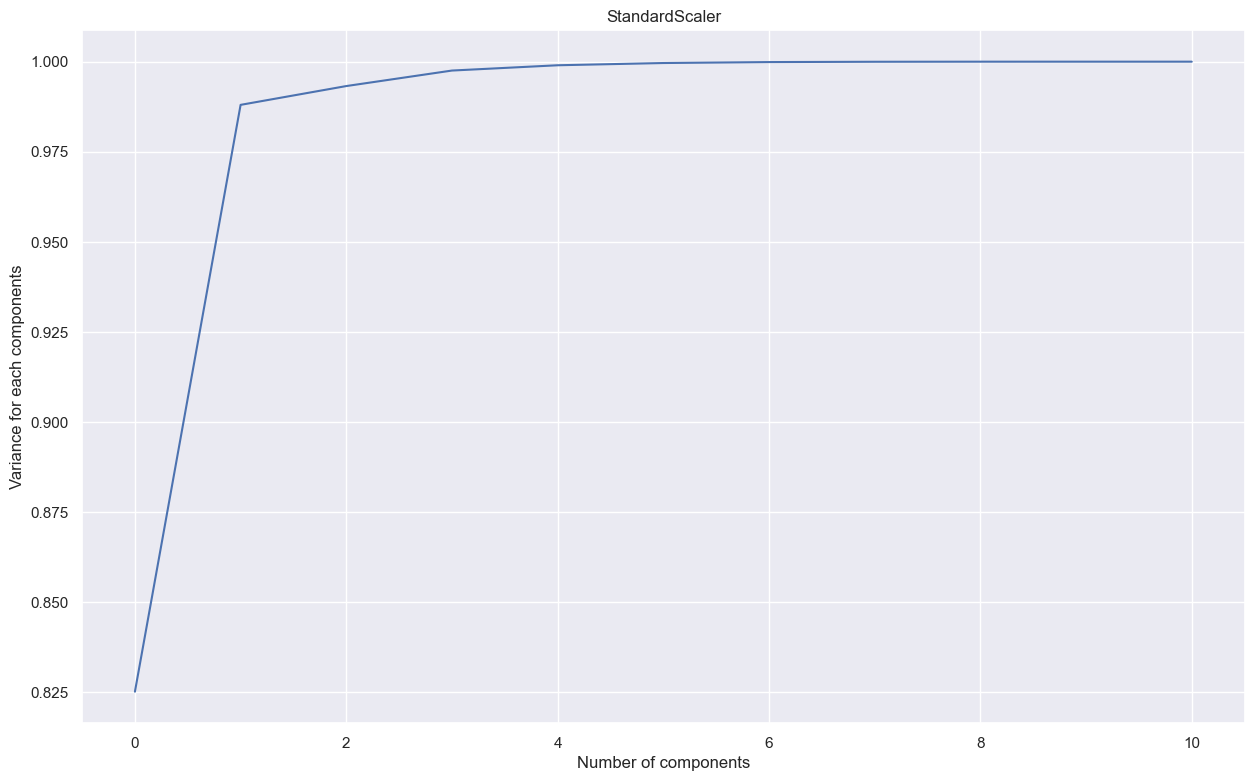

In [37]:
# plotting the cumulative summation of the explained variance
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize=(15,9))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance for each components')
ax.set_title("StandardScaler")

In [38]:
exp_var_cumsum = pd.Series(np.round(pca1.explained_variance_ratio_.cumsum(),4)*100)

for index,var in enumerate(exp_var_cumsum):
    print(f'If pca components is: {index}    Variance: {np.around(var,3)}')



If pca components is: 0    Variance: 82.52
If pca components is: 1    Variance: 98.8
If pca components is: 2    Variance: 99.32
If pca components is: 3    Variance: 99.75
If pca components is: 4    Variance: 99.9
If pca components is: 5    Variance: 99.96
If pca components is: 6    Variance: 99.99
If pca components is: 7    Variance: 100.0
If pca components is: 8    Variance: 100.0
If pca components is: 9    Variance: 100.0
If pca components is: 10    Variance: 100.0


Text(0.5, 1.0, 'StandardScaler')

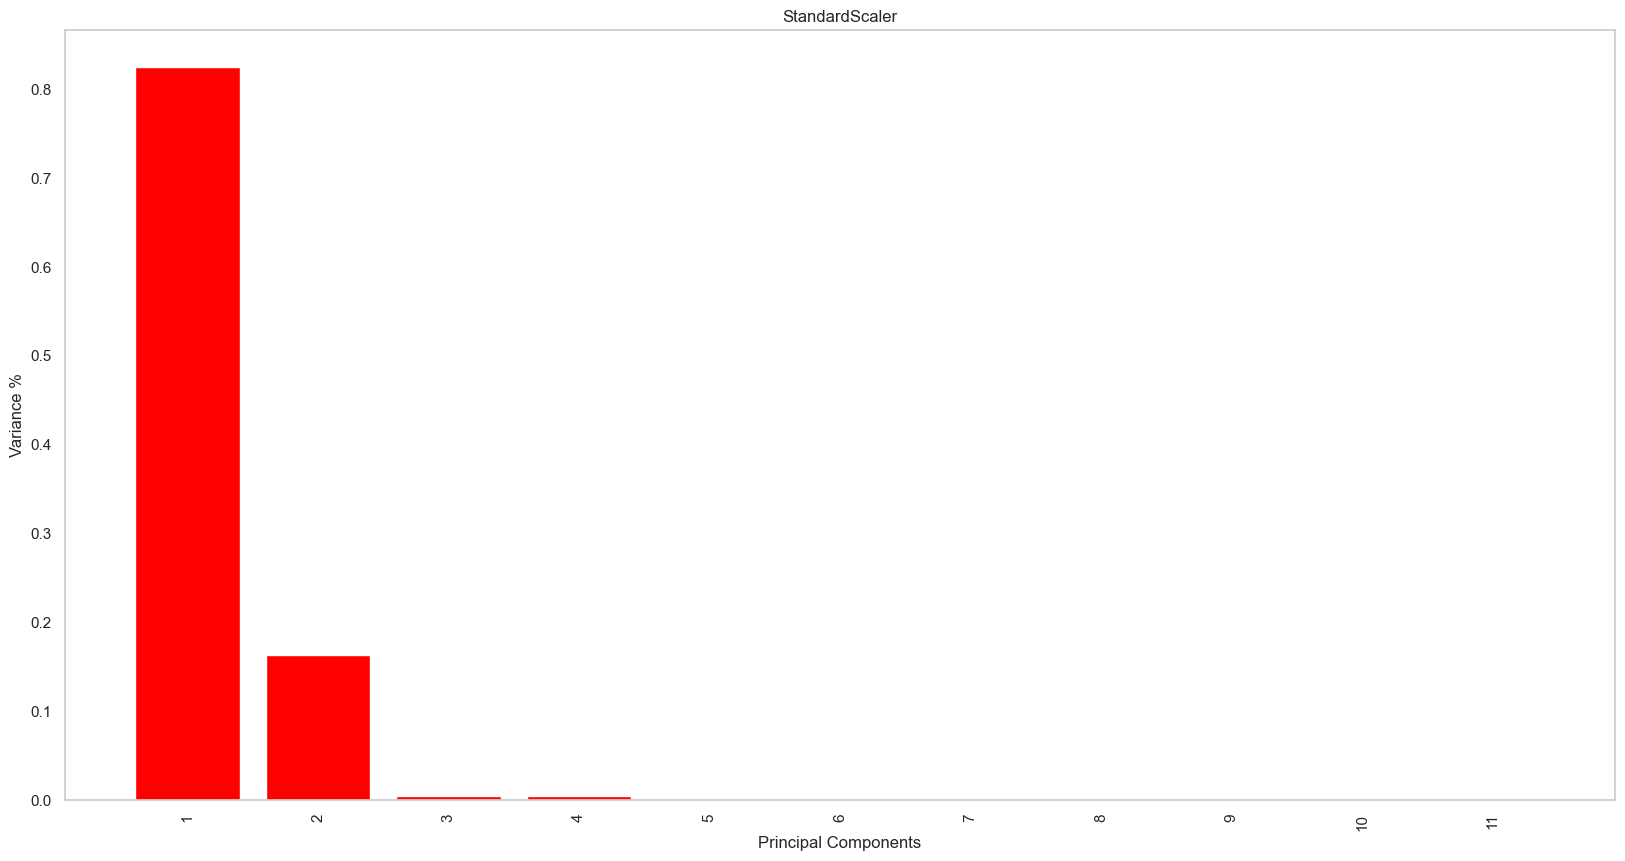

In [39]:
# Plotting the variances for each PC
sns.set_theme(style='whitegrid')
fig = plt.subplots(figsize=(20,10))
PC = range(1, pca1.n_components_+1)
plt.bar(PC, pca1.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.xticks(rotation=1)
plt.ylabel('Variance %')
plt.xticks(PC,rotation=90)
plt.grid()
plt.title("StandardScaler")

Text(0.5, 1.0, 'MinMaxScaler')

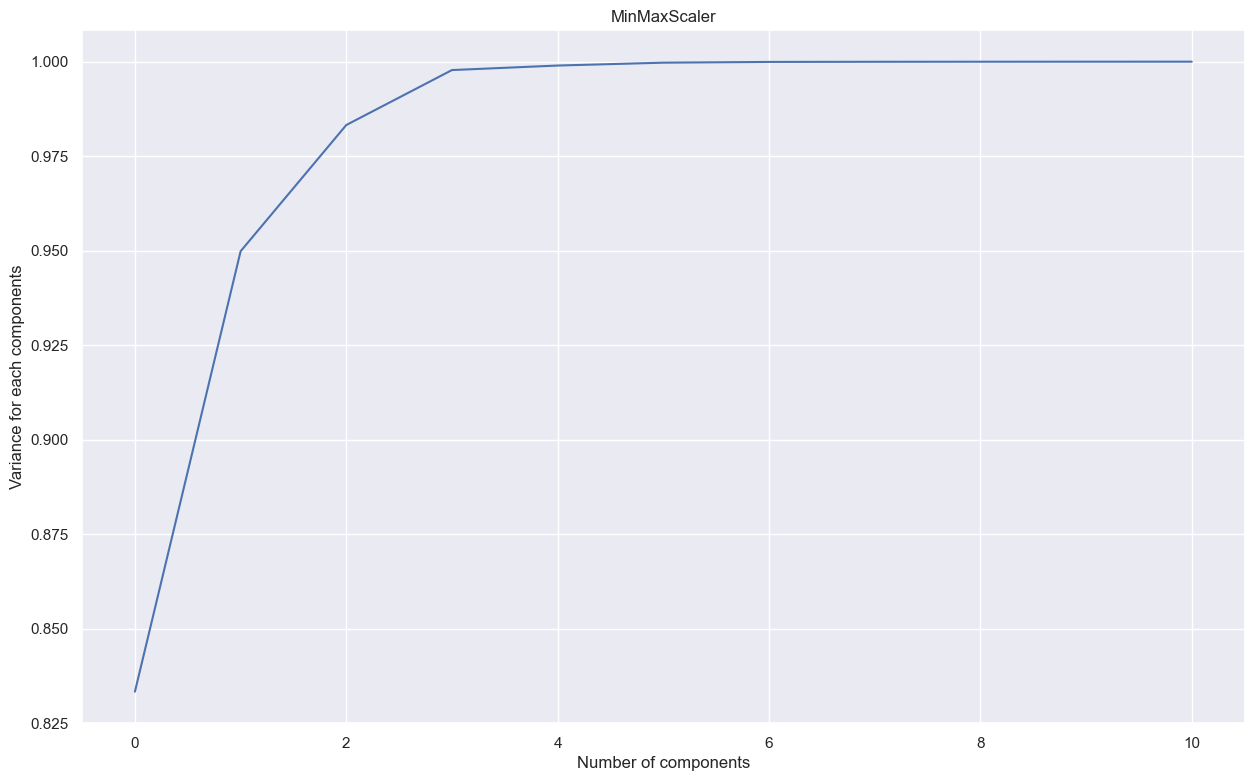

In [40]:
# plotting the cumulative summation of the explained variance
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize=(15,9))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance for each components')
ax.set_title("MinMaxScaler")

In [41]:
exp_var_cumsum = pd.Series(np.round(pca2.explained_variance_ratio_.cumsum(),4)*100)

for index,var in enumerate(exp_var_cumsum):
    print(f'If pca components is: {index}    Variance: {np.around(var,3)}')

If pca components is: 0    Variance: 83.33
If pca components is: 1    Variance: 94.98
If pca components is: 2    Variance: 98.32
If pca components is: 3    Variance: 99.78
If pca components is: 4    Variance: 99.9
If pca components is: 5    Variance: 99.97
If pca components is: 6    Variance: 99.99
If pca components is: 7    Variance: 100.0
If pca components is: 8    Variance: 100.0
If pca components is: 9    Variance: 100.0
If pca components is: 10    Variance: 100.0


Text(0.5, 1.0, 'MinMaxScaler')

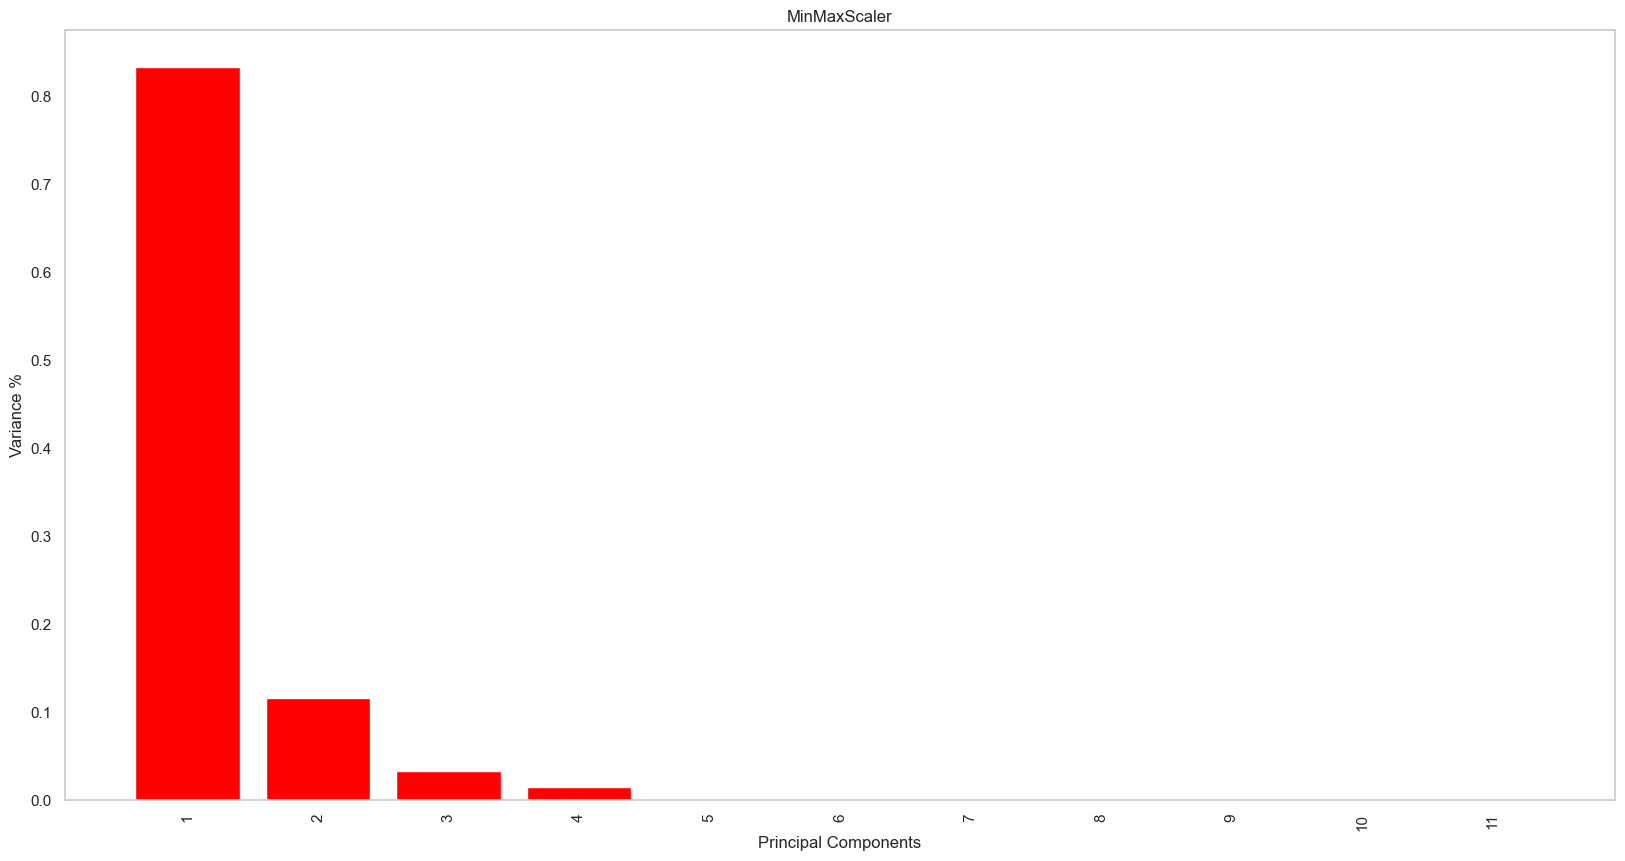

In [42]:
# Plotting the variances for each PC
sns.set_theme(style='whitegrid')
fig = plt.subplots(figsize=(20,10))
PC = range(1, pca2.n_components_+1)
plt.bar(PC, pca2.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.xticks(rotation=1)
plt.ylabel('Variance %')
plt.xticks(PC,rotation=90)
plt.grid()
plt.title("MinMaxScaler")

Text(0.5, 1.0, 'RobustScaler')

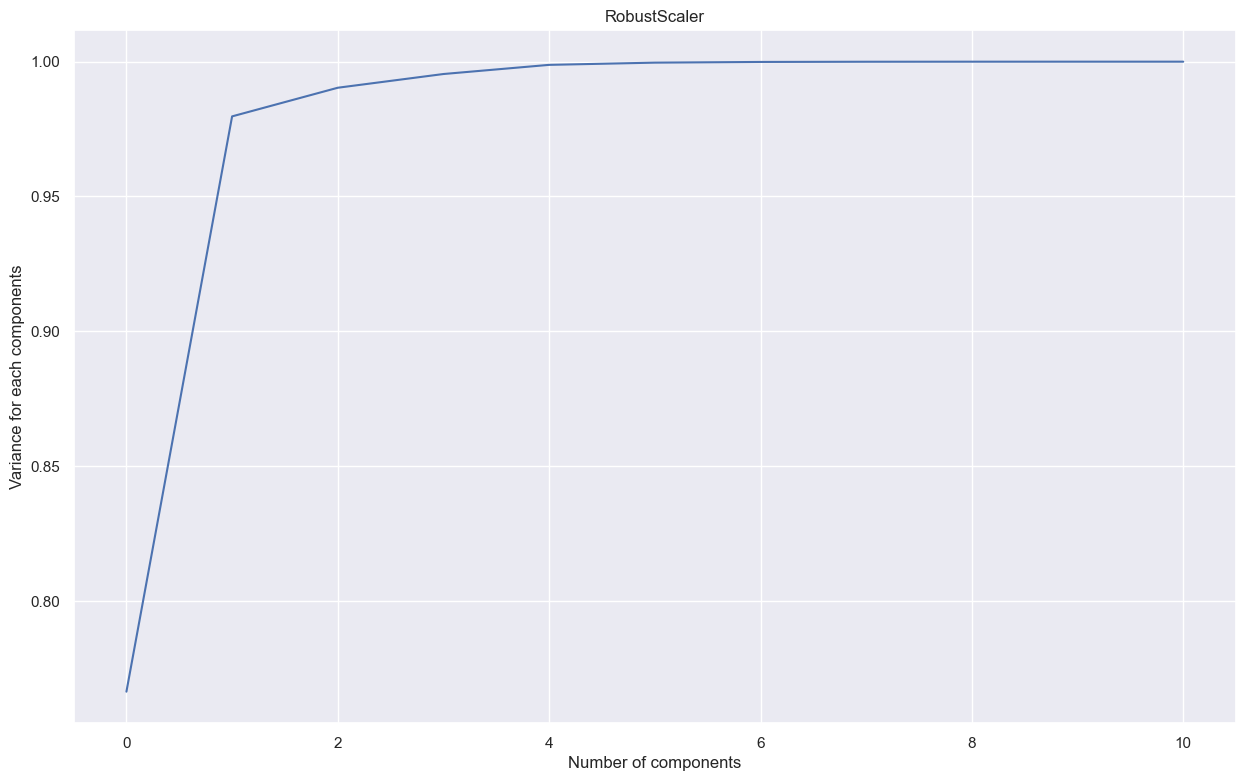

In [43]:
# plotting the cumulative summation of the explained variance
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize=(15,9))
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance for each components')
ax.set_title("RobustScaler")

In [44]:
exp_var_cumsum = pd.Series(np.round(pca3.explained_variance_ratio_.cumsum(),4)*100)

for index,var in enumerate(exp_var_cumsum):
    print(f'If pca components is: {index}    Variance: {np.around(var,3)}')

If pca components is: 0    Variance: 76.63
If pca components is: 1    Variance: 97.97
If pca components is: 2    Variance: 99.03
If pca components is: 3    Variance: 99.54
If pca components is: 4    Variance: 99.88
If pca components is: 5    Variance: 99.96
If pca components is: 6    Variance: 99.99
If pca components is: 7    Variance: 100.0
If pca components is: 8    Variance: 100.0
If pca components is: 9    Variance: 100.0
If pca components is: 10    Variance: 100.0


Text(0.5, 1.0, 'RobustScaler')

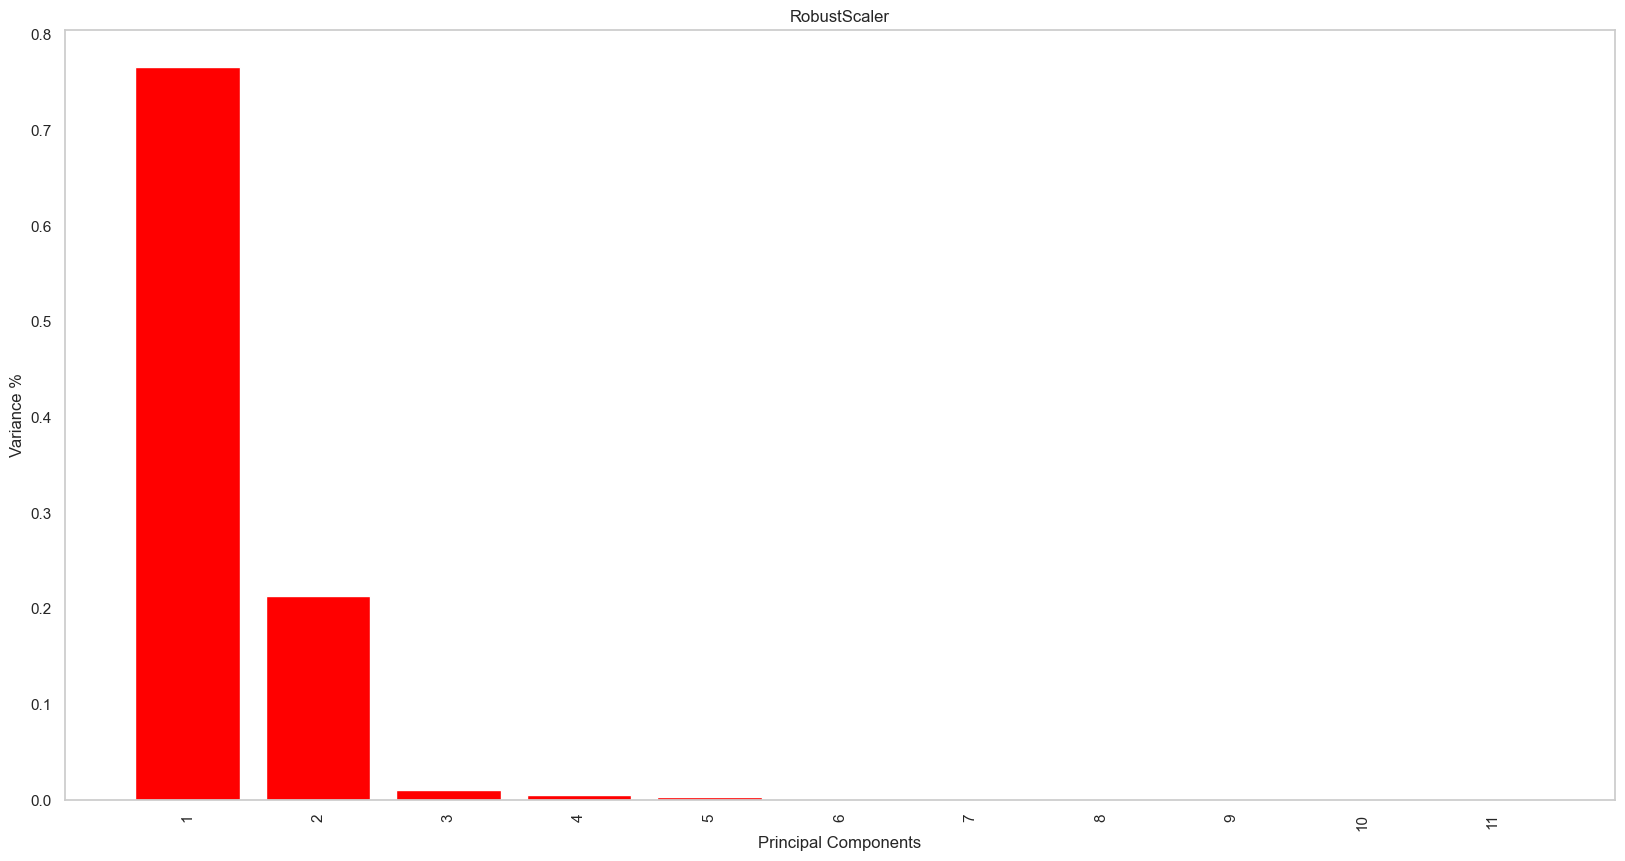

In [45]:
# Plotting the variances for each PC
sns.set_theme(style='whitegrid')
fig = plt.subplots(figsize=(20,10))
PC = range(1, pca3.n_components_+1)
plt.bar(PC, pca3.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.xticks(rotation=1)
plt.ylabel('Variance %')
plt.xticks(PC,rotation=90)
plt.grid()
plt.title("RobustScaler")

In all approaches, 6 componenets with StandardScaler is sufficient for the clustering approach

In [49]:
from sklearn.pipeline import  Pipeline
pipe = Pipeline([
    ('ct',ct1),
    ('pca',PCA(n_components=6))
])

In [50]:
result = pipe.fit_transform(normalise)

In [51]:
result.shape

(17647, 6)

In [53]:
result

array([[ 1.7792121 ,  2.35737039,  0.59274913, -0.4780697 , -0.01300758,
        -0.0858113 ],
       [ 0.60416989,  1.70092027,  0.80424348, -0.28252517, -0.05669429,
        -0.0567765 ],
       [ 2.71028796,  2.4723912 ,  0.58508456, -0.27200201, -0.03210954,
        -0.02662938],
       ...,
       [ 1.02944037, -0.34677876, -0.77568044,  0.37332482, -0.02990925,
        -0.03122146],
       [ 1.52358128, -0.23772969, -0.61259134,  0.67534445, -0.07150718,
        -0.02898184],
       [ 1.41054482, -0.27881227, -0.78761877,  0.44266316, -0.09465323,
        -0.024124  ]])

In [57]:
normalised = pd.DataFrame(result)
normalised.to_csv('../my_data/normalised_data.csv',index=False)